In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Desafio 1

#### Importando e estudando o dataframe

In [2]:
# criando um dataframe a partir da importação do dataset
clientes_df = pd.read_csv("desafio01consumidor-230829-103627.csv")

In [3]:
# mostrando os cinco primeiros dados do dataframe
clientes_df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [4]:
# verificando o tipo de dados de cada coluna e se há dados faltantes
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


### Item 1

In [5]:
# Separando o dataframe em pré e pós pandemia
pre_pandemia = clientes_df.loc[clientes_df["pre-pandemia"] == 1]
pre_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [6]:
pos_pandemia = clientes_df.loc[clientes_df["pre-pandemia"] == 0]
pos_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0


#### Idade

In [7]:
frequencia_absoluta_pre = pre_pandemia.idade.value_counts()
frequencia_absoluta_pre.head()

idade
37    5
26    5
36    4
31    4
38    4
Name: count, dtype: int64

In [8]:
frequencia_relativa_pre = pre_pandemia.idade.value_counts(normalize=True)
frequencia_relativa_pre.head()

idade
37    0.049505
26    0.049505
36    0.039604
31    0.039604
38    0.039604
Name: proportion, dtype: float64

In [9]:
distribuicao_idade_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_idade_pre.sort_index(inplace=True)
distribuicao_idade_pre.head()

,Frequência Absoluta,Frequência Relativa
idade,,
16,1,0.009901
17,1,0.009901
19,1,0.009901
20,2,0.019802
21,2,0.019802


/tmp/ipykernel_8948/2117096670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pre_pandemia.idade)


<Axes: title={'center': 'Distribuição da idade no período de pré-pandemia'}, xlabel='Anos', ylabel='Density'>

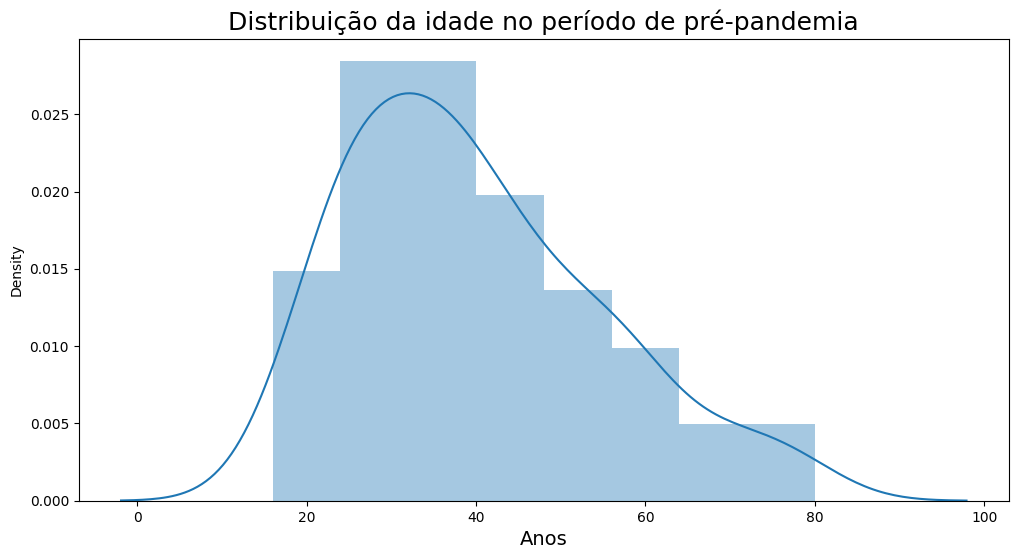

In [10]:
ax = sns.distplot(pre_pandemia.idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da idade no período de pré-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [11]:
frequencia_absoluta_pos = pos_pandemia.idade.value_counts()
frequencia_absoluta_pos.head()

idade
56    7
46    5
35    4
48    4
27    4
Name: count, dtype: int64

In [12]:
frequencia_relativa_pos = pos_pandemia.idade.value_counts(normalize=True)
frequencia_relativa_pos.head()

idade
56    0.068627
46    0.049020
35    0.039216
48    0.039216
27    0.039216
Name: proportion, dtype: float64

In [13]:
distribuicao_idade_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_idade_pos.sort_index(inplace=True)
distribuicao_idade_pos.head()

,Frequência Absoluta,Frequência Relativa
idade,,
15,1,0.009804
17,2,0.019608
22,1,0.009804
23,1,0.009804
24,2,0.019608


/tmp/ipykernel_8948/2687026523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pos_pandemia.idade)


<Axes: title={'center': 'Distribuição da idade no período de pós-pandemia'}, xlabel='Anos', ylabel='Density'>

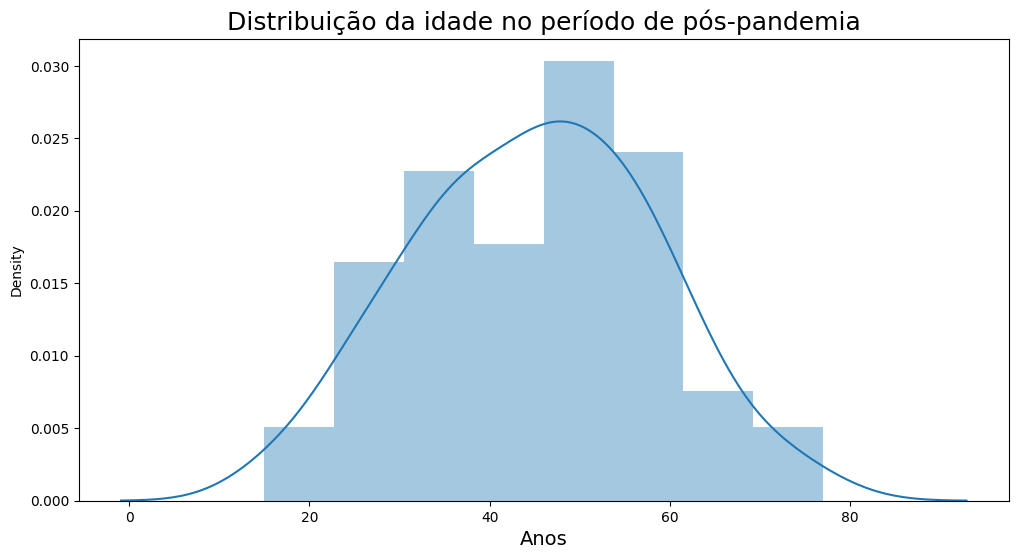

In [14]:
ax = sns.distplot(pos_pandemia.idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da idade no período de pós-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [15]:
idade_info_pandemia = clientes_df.groupby('pre-pandemia')['idade'].agg(['min', 'max', 'mean', 'median'])
idade_info_pandemia.rename(index={0: 'Não', 1: 'Sim'})

,min,max,mean,median
pre-pandemia,,,,
Não,15,77,44.901961,46.0
Sim,16,80,39.881188,37.0


<Axes: title={'center': 'Idade'}, xlabel='Anos', ylabel='pre-pandemia'>

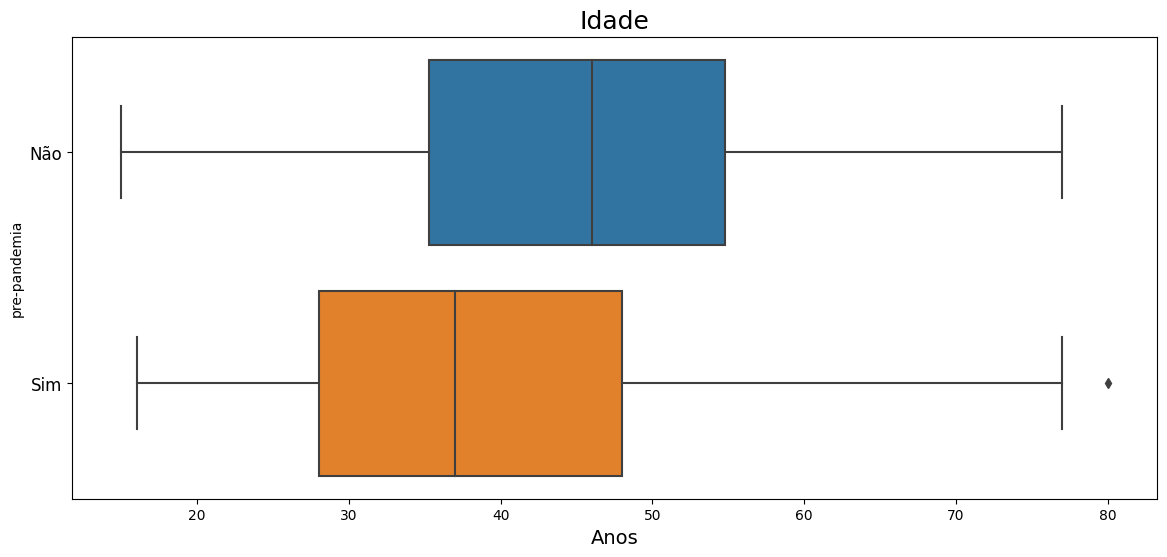

In [16]:
ax = sns.boxplot(x='idade', y='pre-pandemia', data=clientes_df, orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Idade", fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax.set_yticklabels(['Não', 'Sim'], fontsize=12)
ax

#### Renda

In [17]:
frequencia_absoluta_pre = pre_pandemia.renda.value_counts()
frequencia_absoluta_pre.head()

renda
7452     1
14108    1
5112     1
6525     1
11375    1
Name: count, dtype: int64

In [18]:
frequencia_relativa_pre = pre_pandemia.renda.value_counts(normalize=True)
frequencia_relativa_pre.head()

renda
7452     0.009901
14108    0.009901
5112     0.009901
6525     0.009901
11375    0.009901
Name: proportion, dtype: float64

In [19]:
distribuicao_renda_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_renda_pre.sort_index(inplace=True)
distribuicao_renda_pre.head()

,Frequência Absoluta,Frequência Relativa
renda,,
110,1,0.009901
251,1,0.009901
298,1,0.009901
837,1,0.009901
1142,1,0.009901


/tmp/ipykernel_8948/3693543523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pre_pandemia.renda)


<Axes: title={'center': 'Distribuição da renda no período de pré-pandemia'}, xlabel='Anos', ylabel='Density'>

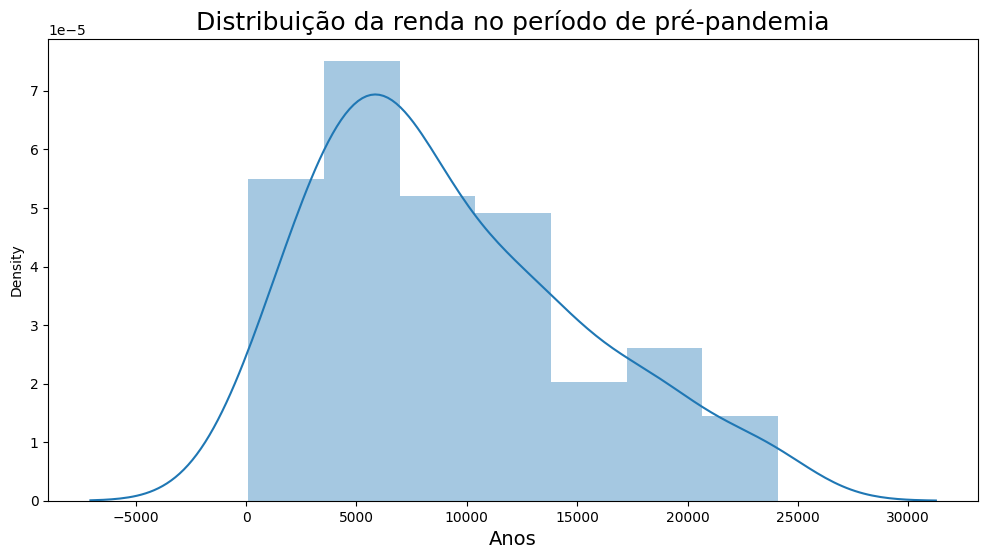

In [20]:
ax = sns.distplot(pre_pandemia.renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da renda no período de pré-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [21]:
frequencia_absoluta_pos = pos_pandemia.renda.value_counts()
frequencia_absoluta_pos.head()

renda
25959    1
18166    1
21422    1
15387    1
5530     1
Name: count, dtype: int64

In [22]:
frequencia_relativa_pos = pos_pandemia.renda.value_counts(normalize=True)
frequencia_relativa_pos.head()

renda
25959    0.009804
18166    0.009804
21422    0.009804
15387    0.009804
5530     0.009804
Name: proportion, dtype: float64

In [23]:
distribuicao_renda_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_renda_pos.sort_index(inplace=True)
distribuicao_renda_pos.head()

,Frequência Absoluta,Frequência Relativa
renda,,
1995,1,0.009804
3191,1,0.009804
4148,1,0.009804
5512,1,0.009804
5530,1,0.009804


/tmp/ipykernel_8948/4279020928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pos_pandemia.renda)


<Axes: title={'center': 'Distribuição da renda no período de pós-pandemia'}, xlabel='Anos', ylabel='Density'>

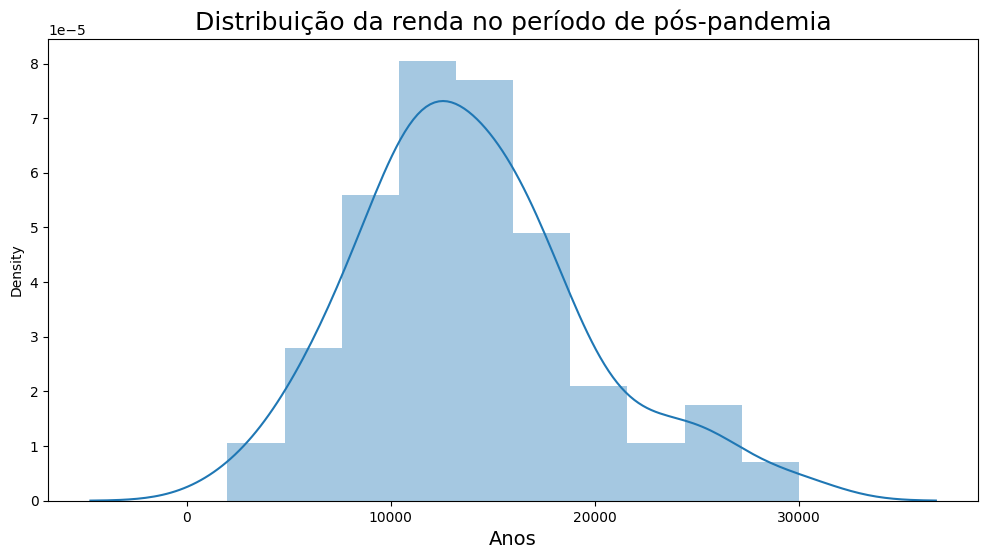

In [24]:
ax = sns.distplot(pos_pandemia.renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da renda no período de pós-pandemia', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [25]:
renda_info_pandemia = clientes_df.groupby('pre-pandemia')['renda'].agg(['min', 'max', 'mean', 'median'])
renda_info_pandemia.rename(index={0: 'Não', 1: 'Sim'})

,min,max,mean,median
pre-pandemia,,,,
Não,1995,30000,13968.500000,13380.5
Sim,110,24090,9180.643564,7488.0


<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='pre-pandemia'>

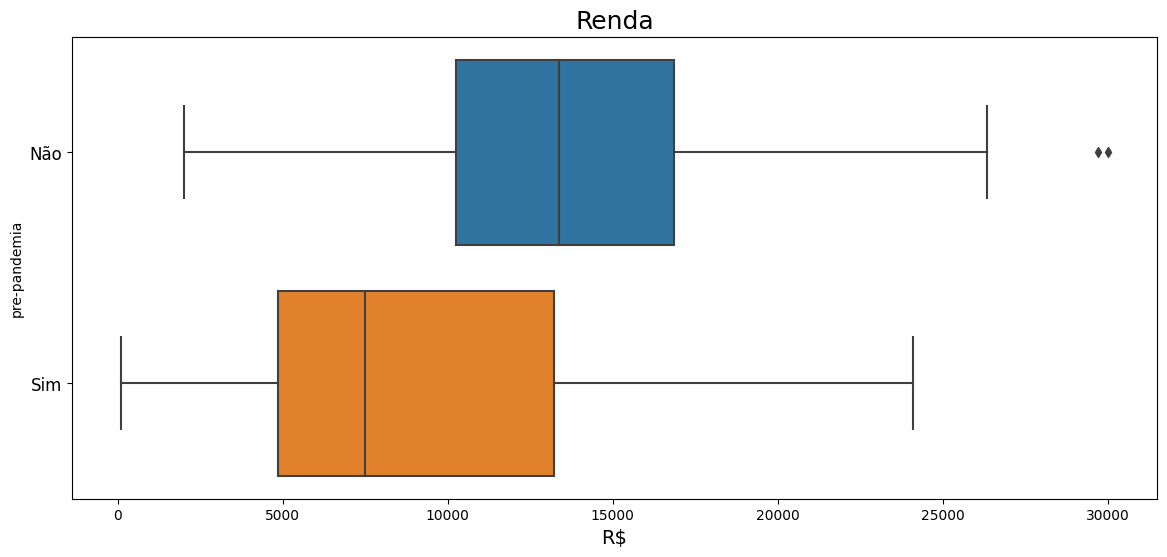

In [26]:
ax = sns.boxplot(x='renda', y='pre-pandemia', data=clientes_df, orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_yticklabels(['Não', 'Sim'], fontsize=12)
ax

#### Região

In [27]:
frequencia_absoluta_pre = pre_pandemia['regiao-BR'].value_counts()
frequencia_absoluta_pre.head()

regiao-BR
Sul             29
Nordeste        26
Sudeste         21
Centro-Oeste    17
Norte            8
Name: count, dtype: int64

In [28]:
frequencia_relativa_pre = pre_pandemia['regiao-BR'].value_counts(normalize=True)
frequencia_relativa_pre.head()

regiao-BR
Sul             0.287129
Nordeste        0.257426
Sudeste         0.207921
Centro-Oeste    0.168317
Norte           0.079208
Name: proportion, dtype: float64

In [29]:
distribuicao_regiao_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_regiao_pre.head()

,Frequência Absoluta,Frequência Relativa
regiao-BR,,
Sul,29,0.287129
Nordeste,26,0.257426
Sudeste,21,0.207921
Centro-Oeste,17,0.168317
Norte,8,0.079208


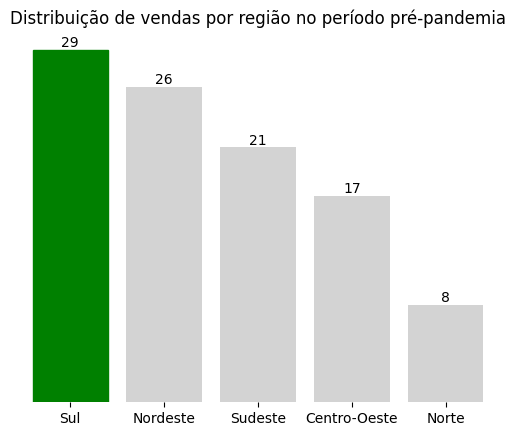

In [30]:
barras = plt.bar(distribuicao_regiao_pre.index, distribuicao_regiao_pre['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_regiao_pre['Frequência Absoluta'])

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Distribuição de vendas por região no período pré-pandemia')

plt.show()

In [31]:
frequencia_absoluta_pos = pos_pandemia['regiao-BR'].value_counts()
frequencia_absoluta_pos.head()

regiao-BR
Sul             42
Nordeste        25
Sudeste         18
Norte            9
Centro-Oeste     8
Name: count, dtype: int64

In [32]:
frequencia_relativa_pos = pos_pandemia['regiao-BR'].value_counts(normalize=True)
frequencia_relativa_pos.head()

regiao-BR
Sul             0.411765
Nordeste        0.245098
Sudeste         0.176471
Norte           0.088235
Centro-Oeste    0.078431
Name: proportion, dtype: float64

In [33]:
distribuicao_regiao_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_regiao_pos.head()

,Frequência Absoluta,Frequência Relativa
regiao-BR,,
Sul,42,0.411765
Nordeste,25,0.245098
Sudeste,18,0.176471
Norte,9,0.088235
Centro-Oeste,8,0.078431


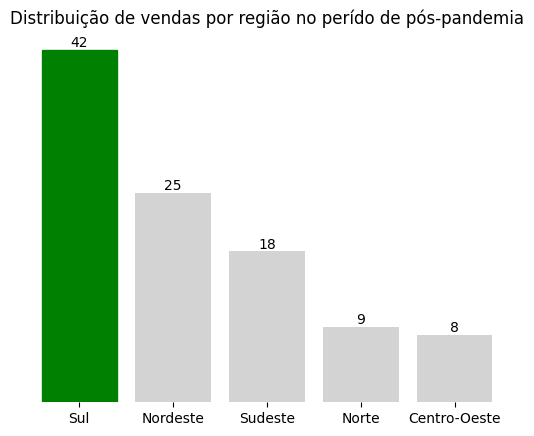

In [34]:
barras = plt.bar(distribuicao_regiao_pos.index, distribuicao_regiao_pos['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_regiao_pos['Frequência Absoluta'])

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Distribuição de vendas por região no perído de pós-pandemia')

plt.show()

#### Produtos

In [35]:
frequencia_absoluta_pre = pre_pandemia.produto.value_counts()
frequencia_absoluta_pre.head()

produto
batom          61
desodorante    20
antissinais     9
sombra          4
perfume         4
Name: count, dtype: int64

In [36]:
frequencia_relativa_pre = pre_pandemia.produto.value_counts(normalize=True)
frequencia_relativa_pre.head()

produto
batom          0.603960
desodorante    0.198020
antissinais    0.089109
sombra         0.039604
perfume        0.039604
Name: proportion, dtype: float64

In [37]:
distribuicao_produto_pre = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pre,
          'Frequência Relativa' : frequencia_relativa_pre}
)
distribuicao_produto_pre.head()

,Frequência Absoluta,Frequência Relativa
produto,,
batom,61,0.603960
desodorante,20,0.198020
antissinais,9,0.089109
sombra,4,0.039604
perfume,4,0.039604


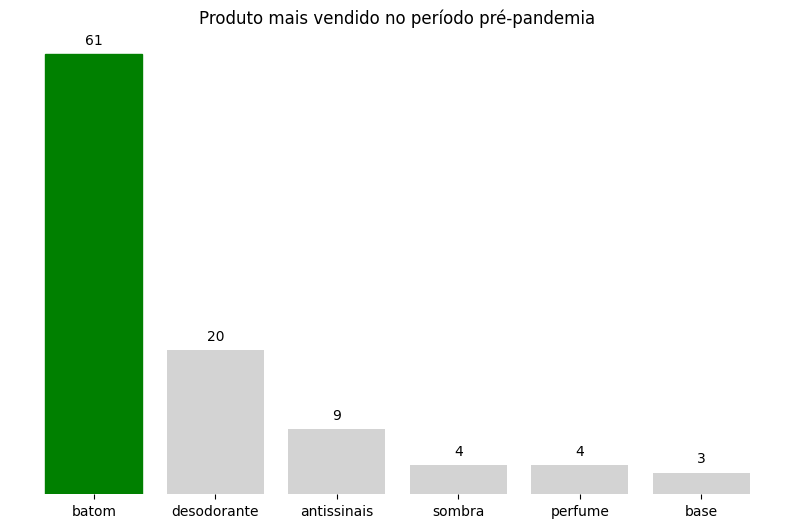

In [38]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

barras = plt.bar(distribuicao_produto_pre.index, distribuicao_produto_pre['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_produto_pre['Frequência Absoluta'], padding=5)

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Produto mais vendido no período pré-pandemia')

plt.show()

In [39]:
frequencia_absoluta_pos = pos_pandemia.produto.value_counts()
frequencia_absoluta_pos.head()

produto
desodorante    46
antissinais    20
batom          15
sombra          9
perfume         8
Name: count, dtype: int64

In [40]:
frequencia_relativa_pos = pos_pandemia.produto.value_counts(normalize=True)
frequencia_relativa_pos.head()

produto
desodorante    0.450980
antissinais    0.196078
batom          0.147059
sombra         0.088235
perfume        0.078431
Name: proportion, dtype: float64

In [41]:
distribuicao_produto_pos = pd.DataFrame(
    data={'Frequência Absoluta' : frequencia_absoluta_pos,
          'Frequência Relativa' : frequencia_relativa_pos}
)
distribuicao_produto_pos.head()

,Frequência Absoluta,Frequência Relativa
produto,,
desodorante,46,0.450980
antissinais,20,0.196078
batom,15,0.147059
sombra,9,0.088235
perfume,8,0.078431


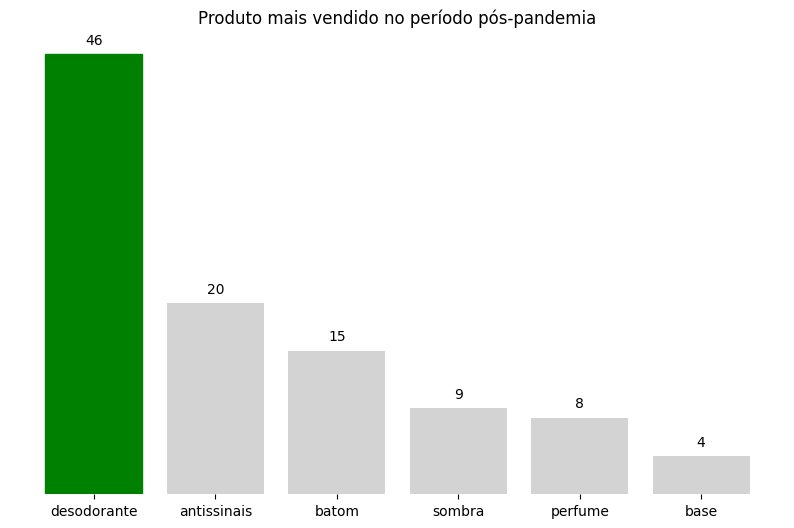

In [42]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

barras = plt.bar(distribuicao_produto_pos.index, distribuicao_produto_pos['Frequência Absoluta'], color='lightgray')

# destaque a região com mais clientes
barras[0].set_color('green')

# valores na barra
plt.bar_label(barras, labels=distribuicao_produto_pos['Frequência Absoluta'], padding=5)

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo y
plt.yticks([])

plt.title('Produto mais vendido no período pós-pandemia')

plt.show()

### Item 2

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Região'>

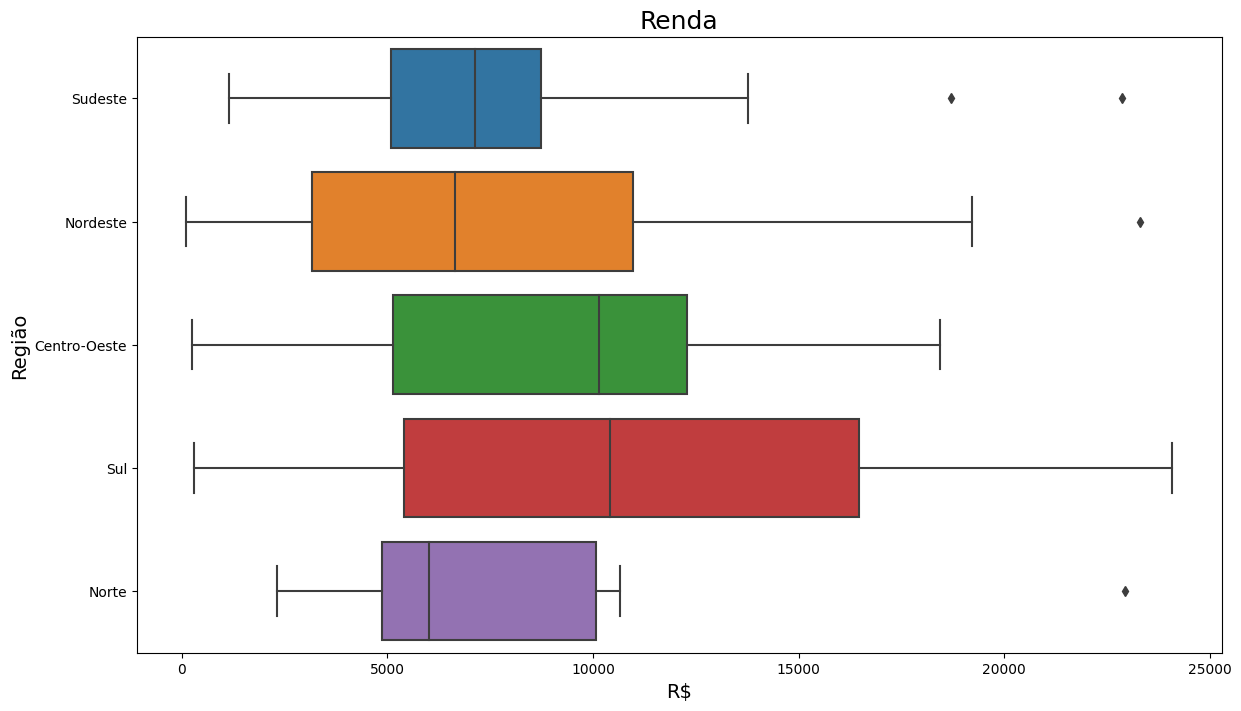

In [43]:
ax = sns.boxplot(x='renda', y='regiao-BR', data=pre_pandemia, orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_ylabel("Região", fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Região'>

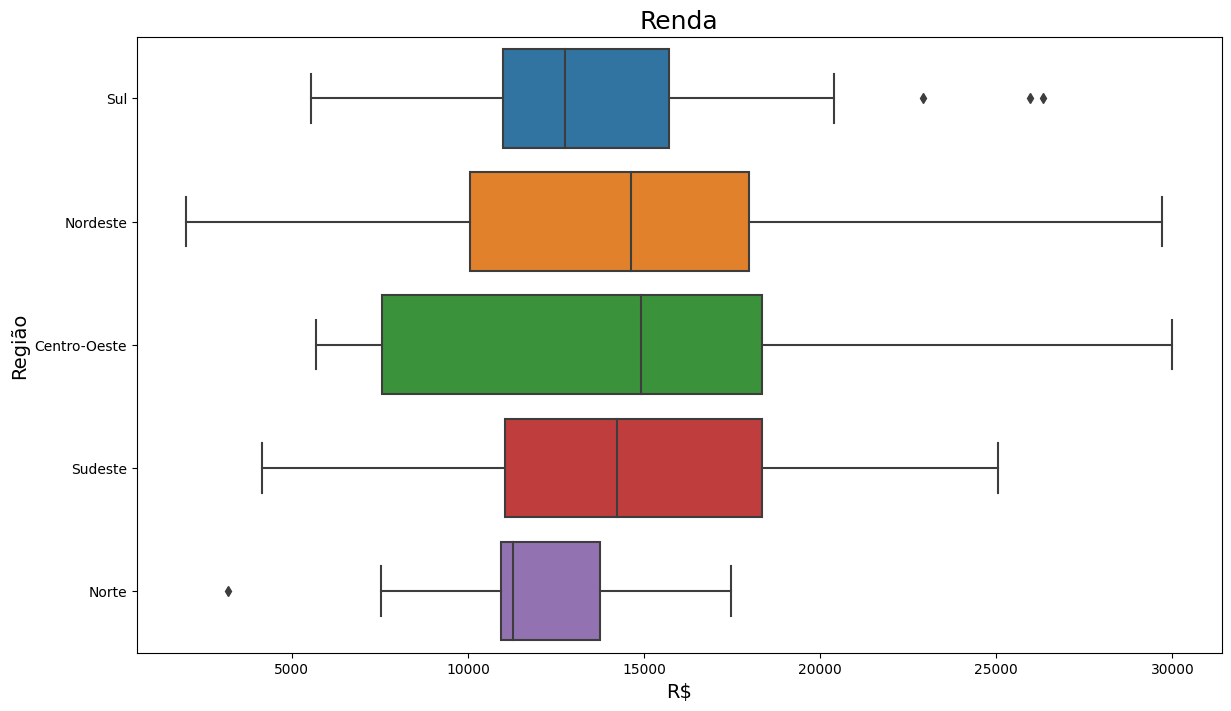

In [44]:
ax = sns.boxplot(x='renda', y='regiao-BR', data=pos_pandemia, orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax.set_ylabel("Região", fontsize=14)
ax

#### Conclusão

**Características do cliente no período de pré-pandemia**
* Público alvo mais jovem, a média da idade dos clientes é de, aproximadamente, 39 anos
* A renda média é de R$ 9.180,00
* A região com mais vendas é a região Sul
* Batom é o produto mais vendido

**Características do cliente no período de pós-pandemia**
* Público alvo mais velho, a média da idade dos clientes é de, aproximadamente, 46 anos
* A renda média é de R$ 13.968,00
* A região com mais vendas é a Sul
* Desodorante é o produto mais vendido

#### Diferenças nítidas pré e pós pandemia
* A média de idade dos clientes teve um aumento de 7 anos (Lojas fechadas... Pessoas mais velhas passaram a comprar itens online?)
* A renda dos clientes aumentou (Negócio próprio? Novo emprego? Inflação?)
* A região Sul continua sendo a região com mais vendas
* O produto mais vendido deixou de ser o batom para passar a ser o desodorante

#### Estatística
* A média de idade aumentou, aproximadamente, 18%
* A renda média dos clientes cresceu 52%
* A região Sul teve um aumento de vendas de 45%

### Item 3

In [45]:
# Dados fornecidos no problema
N = 100000
confianca = 0.95
erro_percentual = 0.02

In [46]:
# Calculando z a partir do valor de confiança fornecido
z = norm.ppf(confianca/2 + 0.5)
z

1.959963984540054

In [47]:
s = clientes_df.renda.std()
s

6288.0167075146455

In [48]:
media_amostral = clientes_df.renda.mean()
media_amostral

11586.364532019705

In [49]:
e = media_amostral * erro_percentual
e

231.7272906403941

#### Obtendo $n$

#### $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [50]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
n = int(n.round())
n

2751

In [51]:
resposta = "A base informada não é suficiente" if clientes_df.shape[0] < n else "A base informada é suficiente"
print(f"{resposta}, tamanho da base é de {clientes_df.shape[0]}\ne o requerido para 95% confiança com 2% de margem de erro é {n}")

A base informada não é suficiente, tamanho da base é de 203
e o requerido para 95% confiança com 2% de margem de erro é 2751


In [52]:
erro_percentual = 0.1
e = media_amostral * erro_percentual
e

1158.6364532019704

In [53]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
n = int(n.round())
n

113

In [54]:
resposta = "A base informada não é suficiente" if clientes_df.shape[0] < n else "A base informada é suficiente"
print(f"{resposta}, tamanho da base é de {clientes_df.shape[0]}\ne o requerido para 95% confiança com 10% de margem de erro é {n}")

A base informada é suficiente, tamanho da base é de 203
e o requerido para 95% confiança com 10% de margem de erro é 113


# Desafio 2

#### Importando e estudando o dataframe

In [55]:
estoque = pd.read_csv("desafio_02_estoque-230829-103603.csv")

In [56]:
estoque.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [57]:
estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [58]:
estoque.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


### Item 1

#### Obtendo k (número de classes) pela regra de Sturges

In [59]:
# Calculando o tamanho do dataset (número de linhas)
n = estoque.shape[0]
n

370

In [60]:
# Definindo o número de classe seguindo a regra de Sturges
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

10

#### Vendas de iogurte

In [61]:
# Obtendo a frequência absoluta das vendas de iogurte
frequencia_absoluta = pd.value_counts(
  pd.cut(
    x = estoque['vendas-iogurte'],
    bins = k,
    include_lowest = True
  ),
  sort = False
)
frequencia_absoluta

vendas-iogurte
(4810.577, 4853.2]     9
(4853.2, 4895.4]      26
(4895.4, 4937.6]      43
(4937.6, 4979.8]      78
(4979.8, 5022.0]      74
(5022.0, 5064.2]      65
(5064.2, 5106.4]      42
(5106.4, 5148.6]      25
(5148.6, 5190.8]       5
(5190.8, 5233.0]       3
Name: count, dtype: int64

In [62]:
# Obtendo a frequência relativa das vendas de iogurte
frequencia_relativa = pd.value_counts(
  pd.cut(
    x = estoque['vendas-iogurte'],
    bins = k,
    include_lowest = True
  ),
  sort = False,
  normalize=True
)
frequencia_relativa

vendas-iogurte
(4810.577, 4853.2]    0.024324
(4853.2, 4895.4]      0.070270
(4895.4, 4937.6]      0.116216
(4937.6, 4979.8]      0.210811
(4979.8, 5022.0]      0.200000
(5022.0, 5064.2]      0.175676
(5064.2, 5106.4]      0.113514
(5106.4, 5148.6]      0.067568
(5148.6, 5190.8]      0.013514
(5190.8, 5233.0]      0.008108
Name: proportion, dtype: float64

In [63]:
# Criando um novo dataframe composto pelas frequências de vendas calculadas anteriormente
dist_freq_vendas = pd.DataFrame(
    {'Frequência Absoluta': frequencia_absoluta, 'Frequência Relativa': frequencia_relativa}
)
dist_freq_vendas

,Frequência Absoluta,Frequência Relativa
vendas-iogurte,,
"(4810.577, 4853.2]",9,0.024324
"(4853.2, 4895.4]",26,0.070270
"(4895.4, 4937.6]",43,0.116216
"(4937.6, 4979.8]",78,0.210811
"(4979.8, 5022.0]",74,0.200000
"(5022.0, 5064.2]",65,0.175676
"(5064.2, 5106.4]",42,0.113514
"(5106.4, 5148.6]",25,0.067568
"(5148.6, 5190.8]",5,0.013514


/tmp/ipykernel_8948/2073885371.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(estoque['vendas-iogurte'], bins=k)


<Axes: title={'center': 'Distribuição das vendas de iogurte'}, xlabel='Vendas', ylabel='Density'>

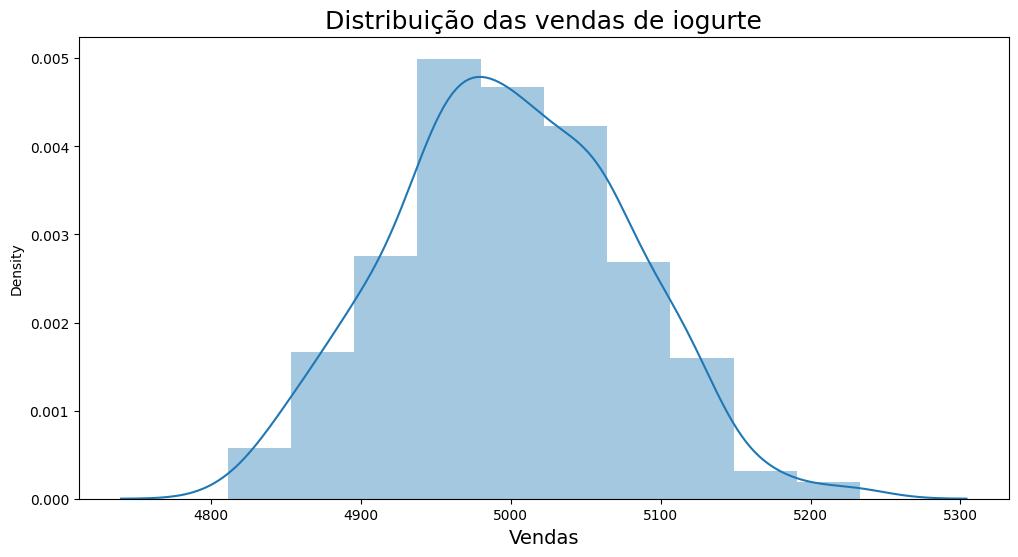

In [64]:
# Mostrando de forma gráfica a distribuição das vendas
ax = sns.distplot(estoque['vendas-iogurte'], bins=k)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das vendas de iogurte', fontsize=18)
ax.set_xlabel('Vendas', fontsize=14)
ax

In [65]:
moda = estoque['vendas-iogurte'].mode()[0]
moda

5020

In [66]:
mediana = estoque['vendas-iogurte'].median()
mediana

4996.0

In [67]:
media = estoque['vendas-iogurte'].mean()
media

4999.1702702702705

In [68]:
desvio_padrao = estoque['vendas-iogurte'].std()
desvio_padrao

77.28506821873455

##### Conclusão

* Com base na relação entre moda, mediana e média, nota-se que os valores dessas variáveis são bem próximos, o que indica que a distribuição é simétrica
* Ao observar o histograma das vendas, pode-se notar que a distribuição possui uma curva que se assemelha a um sino

Com essas características, tem-se fortes indícios de que a variável vendas-iogurte segue uma distribuição normal com média de 5000 vendas e desvio padrão de, aproximadamente, 77.

#### Lead time

In [69]:
# Obtendo a frequência absoluta do tempo de entrega
frequencia_absoluta = pd.value_counts(
  pd.cut(
    x = estoque['lead-time'],
    bins = k,
    include_lowest = True
  ),
  sort = False
)
frequencia_absoluta

lead-time
(0.991, 1.8]     5
(1.8, 2.6]      13
(2.6, 3.4]      37
(3.4, 4.2]      77
(4.2, 5.0]      89
(5.0, 5.8]       0
(5.8, 6.6]      79
(6.6, 7.4]      50
(7.4, 8.2]      14
(8.2, 9.0]       6
Name: count, dtype: int64

In [70]:
# Obtendo a frequência relativa do tempo de entrega
frequencia_relativa = pd.value_counts(
  pd.cut(
    x = estoque['lead-time'],
    bins = k,
    include_lowest = True
  ),
  sort = False,
  normalize=True
)
frequencia_relativa

lead-time
(0.991, 1.8]    0.013514
(1.8, 2.6]      0.035135
(2.6, 3.4]      0.100000
(3.4, 4.2]      0.208108
(4.2, 5.0]      0.240541
(5.0, 5.8]      0.000000
(5.8, 6.6]      0.213514
(6.6, 7.4]      0.135135
(7.4, 8.2]      0.037838
(8.2, 9.0]      0.016216
Name: proportion, dtype: float64

In [71]:
# Criando um novo dataframe composto pelas frequências de lead time calculadas anteriormente
dist_freq_lead_time = pd.DataFrame(
    {'Frequência Absoluta': frequencia_absoluta, 'Frequência Relativa': frequencia_relativa}
)
dist_freq_lead_time

,Frequência Absoluta,Frequência Relativa
lead-time,,
"(0.991, 1.8]",5,0.013514
"(1.8, 2.6]",13,0.035135
"(2.6, 3.4]",37,0.100000
"(3.4, 4.2]",77,0.208108
"(4.2, 5.0]",89,0.240541
"(5.0, 5.8]",0,0.000000
"(5.8, 6.6]",79,0.213514
"(6.6, 7.4]",50,0.135135
"(7.4, 8.2]",14,0.037838


/tmp/ipykernel_8948/317452140.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(estoque['lead-time'], bins=k)


<Axes: title={'center': 'Distribuição do tempo de entrega dos iogurtes'}, xlabel='Dias', ylabel='Density'>

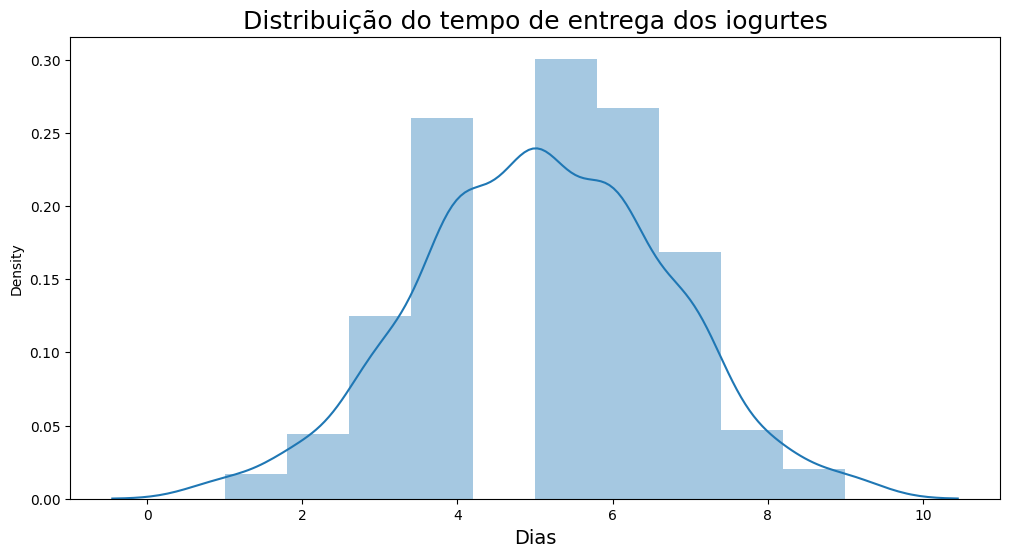

In [72]:
# Mostrando de forma gráfica a distribuição das vendas
ax = sns.distplot(estoque['lead-time'], bins=k)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do tempo de entrega dos iogurtes', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax

In [73]:
moda = estoque['lead-time'].mode()[0]
moda

5

In [74]:
mediana = estoque['lead-time'].median()
mediana

5.0

In [75]:
media = estoque['lead-time'].mean()
media

5.094594594594595

In [76]:
desvio_padrao = estoque['lead-time'].std()
desvio_padrao

1.5787281673958213

##### Conclusão

* Com base na relação entre moda, mediana e média, nota-se que os valores dessas variáveis são iguais, o que indica que o gráfico da distribuição é simétrico
* Ao observar o histograma do tempo de entrega, pode-se notar que a distribuição possui uma curva que se assemelha a um sino

Com essas características, tem-se fortes indícios de que o lead-time segue uma distribuição normal com média de 5 dias e desvio padrão de, aproximadamente, 2 dias

### Item 2

In [77]:
# Dados dado no problema
nivel_servico = 0.9987

#### Calculando Z

In [78]:
z = norm.ppf(nivel_servico/2 + 0.5)
z

3.21597976078809

#### Calculando a demanda média passada ou estimada

In [79]:
estoque

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


In [80]:
estoque['data'] = pd.to_datetime(estoque['data'])

In [81]:
estoque_2021 = estoque[estoque['data'].dt.year == 2021]
estoque_2021

,data,vendas-iogurte,lead-time
313,2021-01-03,5052,5
314,2021-01-10,4968,7
315,2021-01-17,5053,9
316,2021-01-24,4958,3
317,2021-01-31,4959,6
318,2021-02-07,5037,6
319,2021-02-14,4996,5
320,2021-02-21,5013,2
321,2021-02-28,5013,5
322,2021-03-07,4902,6


In [82]:
demanda_mensal = estoque_2021.groupby(estoque['data'].dt.month)['vendas-iogurte'].sum()
demanda_mensal

data
1     24990
2     20059
3     19772
4     20131
5     25357
6     19867
7     19757
8     25075
9     19854
10    24922
11    19844
12    20209
Name: vendas-iogurte, dtype: int64

In [83]:
demanda_media_mensal = demanda_mensal.mean()
demanda_media_mensal

21653.083333333332

#### Calculando lead time médio

In [84]:
total_lead_time = estoque_2021.groupby(estoque['data'].dt.month)['lead-time'].sum()
total_lead_time

data
1     30
2     18
3     19
4     24
5     29
6     20
7     25
8     26
9     21
10    22
11    19
12    21
Name: lead-time, dtype: int64

In [85]:
lead_time_medio = total_lead_time.mean()
lead_time_medio

22.833333333333332

#### Calculando o desvio padrão da demanda

In [86]:
desvio_padrao_demanda_mensal = demanda_mensal.std()
desvio_padrao_demanda_mensal

2541.040247197747

#### Calculando o desvio padrão do lead time

In [87]:
desvio_padrao_lead_time = estoque_2021['lead-time'].std()
desvio_padrao_lead_time

1.716304564308463

#### Obtendo o estoque de segurança desejado

In [88]:
estoque_seguranca = z * np.sqrt(((desvio_padrao_demanda_mensal**2) * lead_time_medio) + ((desvio_padrao_lead_time**2) * (demanda_media_mensal**2)))
estoque_seguranca = int(estoque_seguranca.round(0))
print(f"O estoque de segurança deve ser de {estoque_seguranca} produtos")

O estoque de segurança deve ser de 125734 produtos


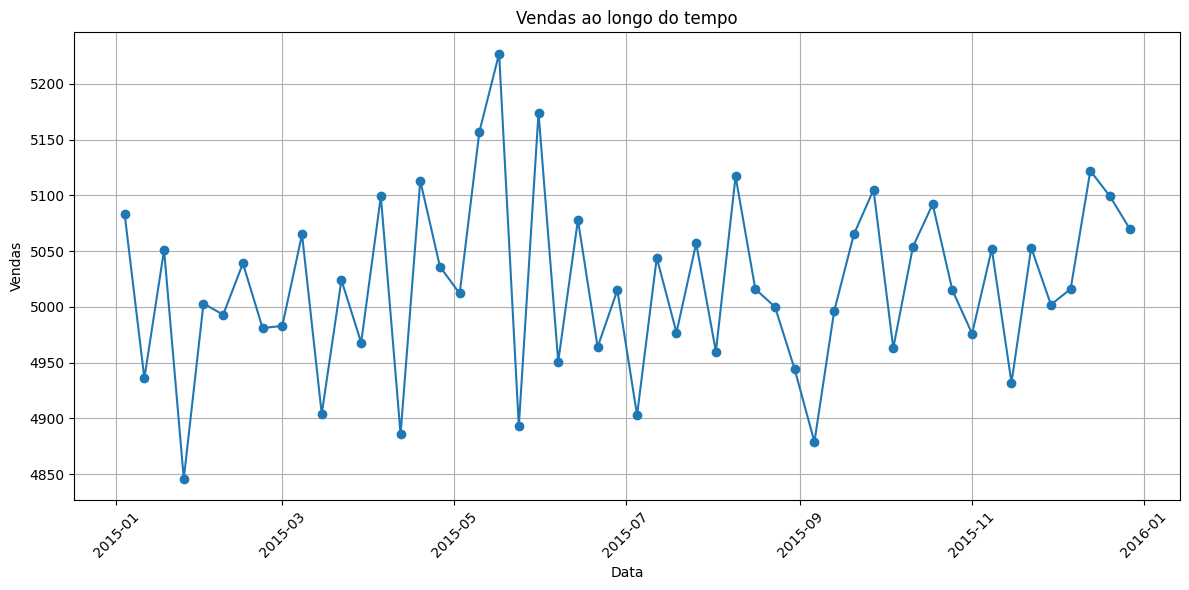

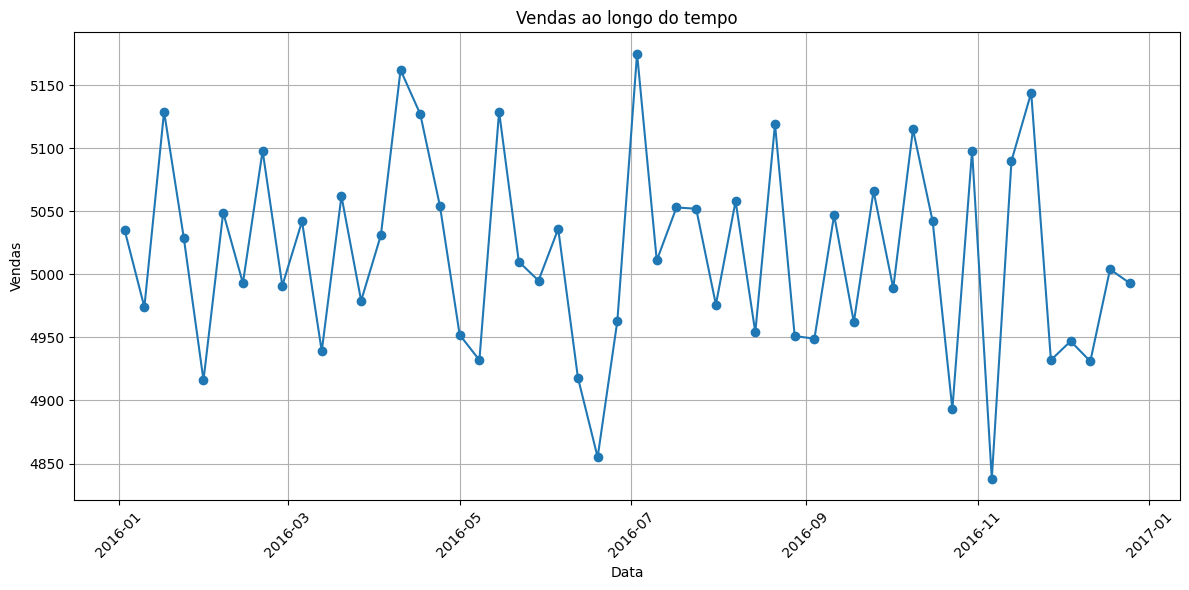

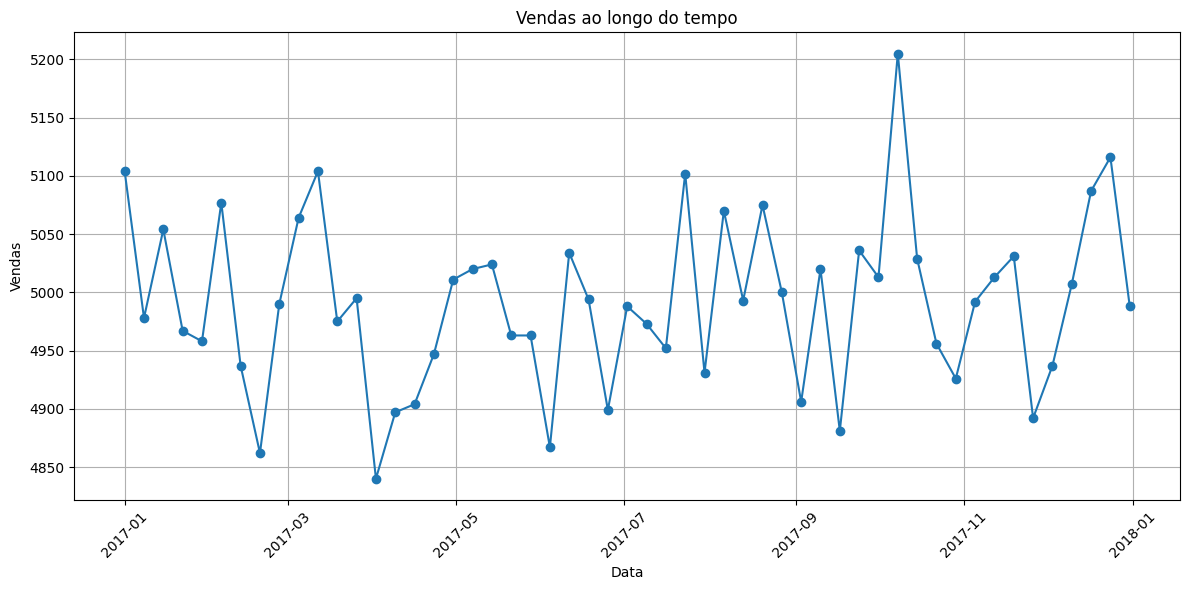

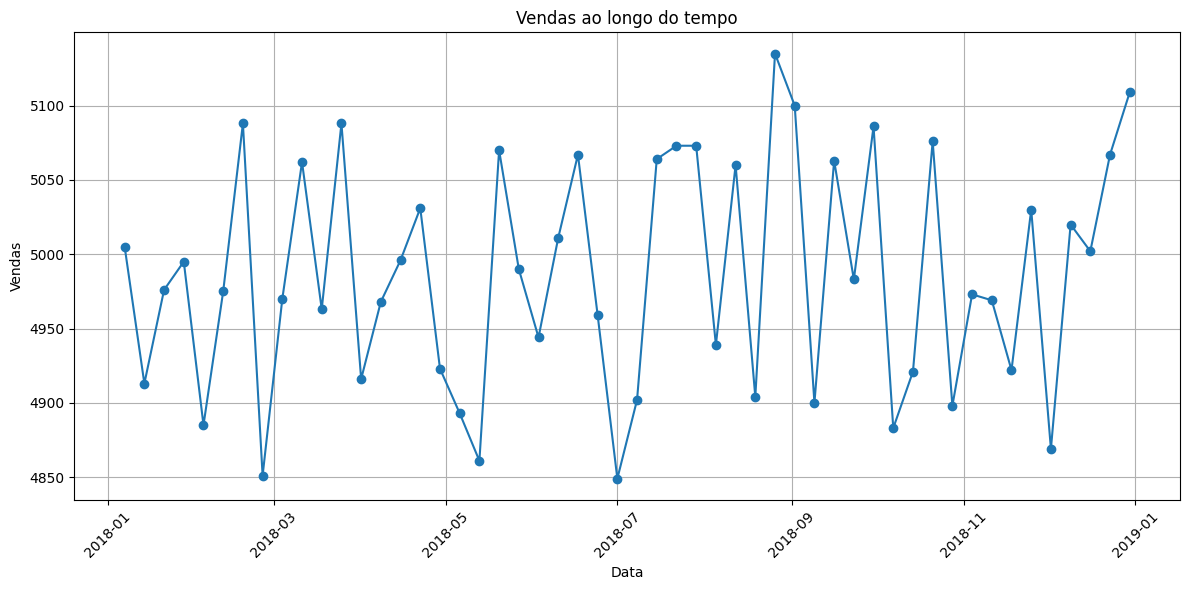

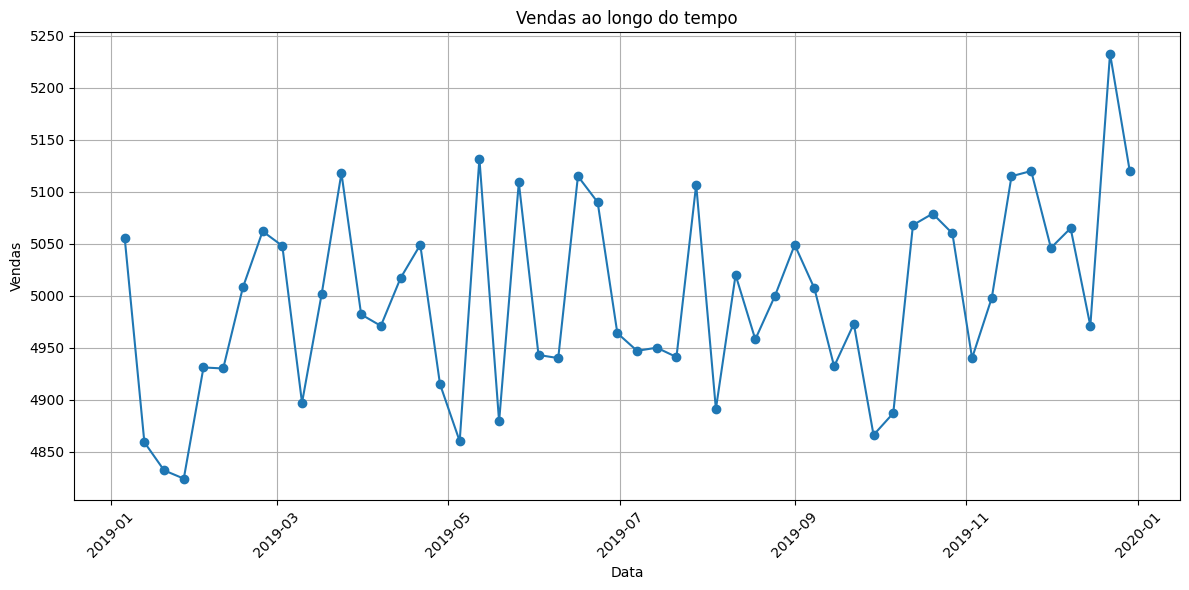

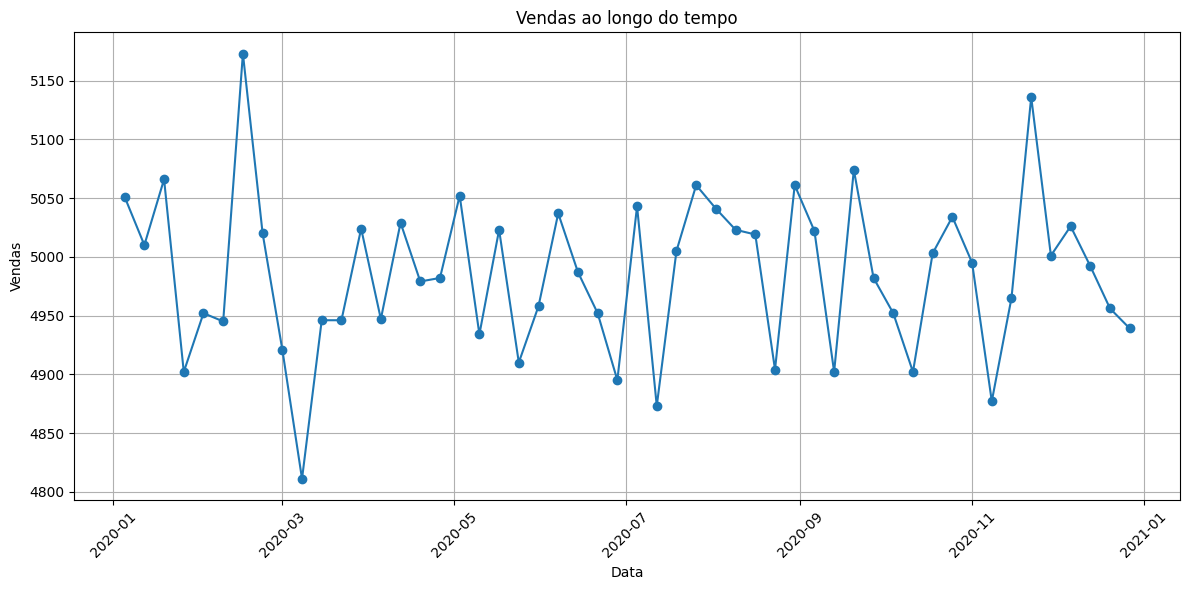

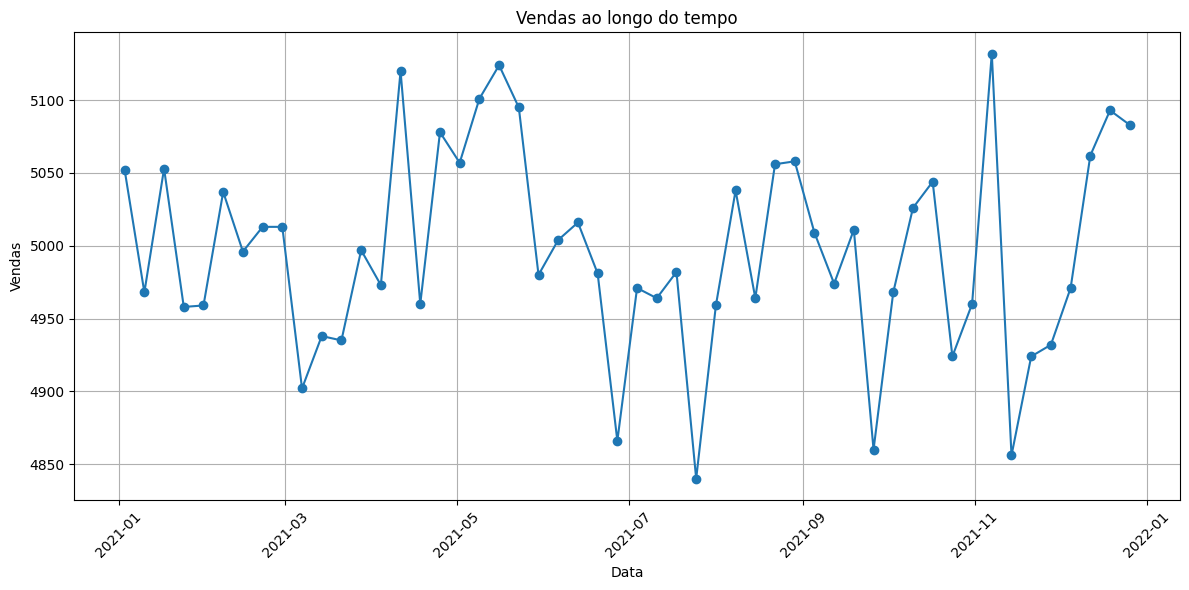

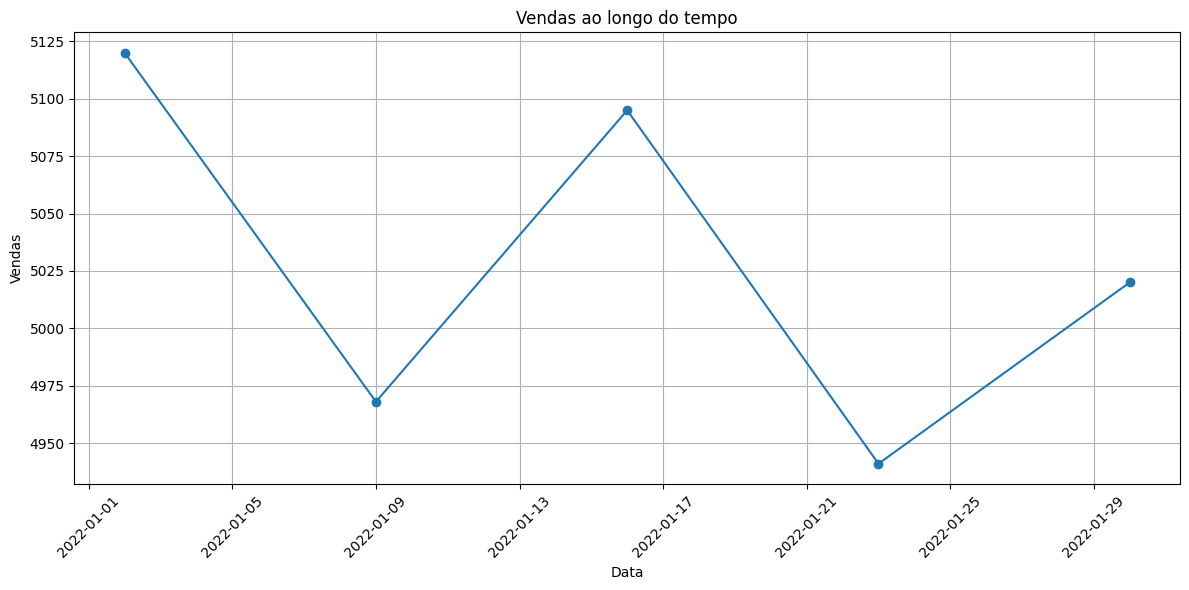

In [89]:
# Configure o tamanho do gráfico

for ano in estoque['data'].dt.year.unique():

    plt.figure(figsize=(12, 6))
    dados_ano_especifico = estoque.query('data.dt.year == @ano')
    datas_ano = pd.to_datetime(dados_ano_especifico['data'])

    # Ordene o DataFrame pela coluna de data, se ainda não estiver ordenado
    datas_ano = datas_ano.sort_values()

    # Plote o gráfico de linha
    plt.plot(datas_ano, dados_ano_especifico['vendas-iogurte'], marker='o', linestyle='-')

    # Defina rótulos para os eixos
    plt.xlabel('Data')
    plt.ylabel('Vendas')

    # Defina um título para o gráfico
    plt.title('Vendas ao longo do tempo')

    # Rotacione os rótulos do eixo x para torná-los mais legíveis (opcional)
    plt.xticks(rotation=45)

    # Exiba o gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

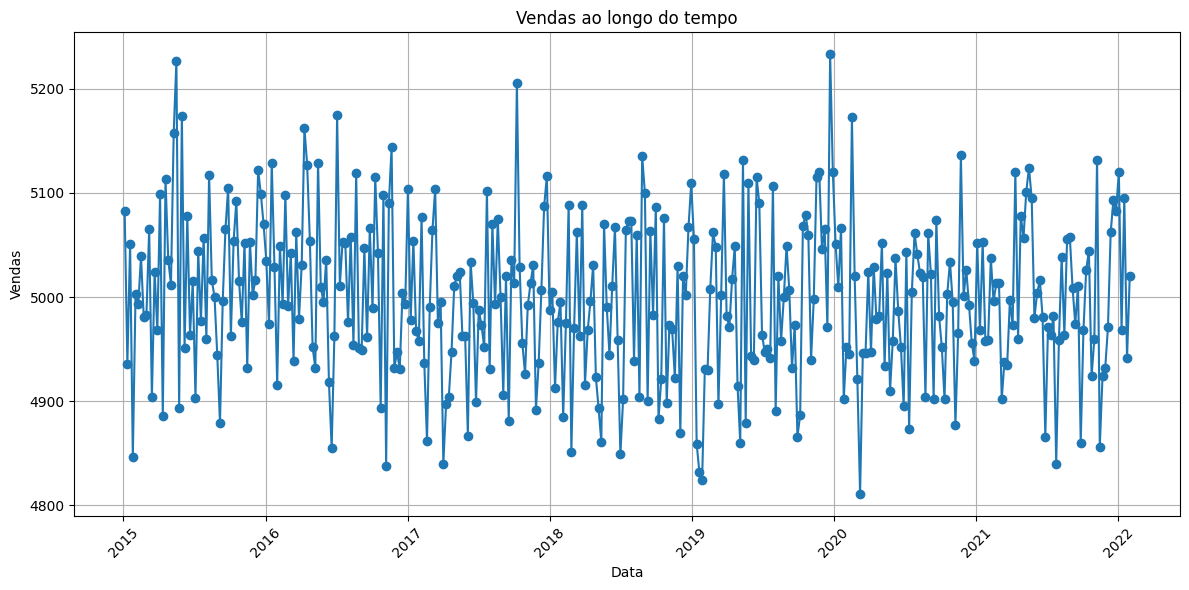

In [90]:
plt.figure(figsize=(12, 6))
# Plote o gráfico de linha
plt.plot(estoque['data'], estoque['vendas-iogurte'], marker='o', linestyle='-')

# Defina rótulos para os eixos
plt.xlabel('Data')
plt.ylabel('Vendas')

# Defina um título para o gráfico
plt.title('Vendas ao longo do tempo')

# Rotacione os rótulos do eixo x para torná-los mais legíveis (opcional)
plt.xticks(rotation=45)

# Exiba o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()